In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])

In [2]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [64]:
import scipy.stats

In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

In [23]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


The following describes the dataset variables:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

## Task 4: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels
For the "Median value of owner-occupied homes" provide a boxplot
Provide a  bar plot for the Charles river variable
Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
Create a histogram for the pupil to teacher ratio variable

#### For the "Median value of owner-occupied homes" provide a boxplot

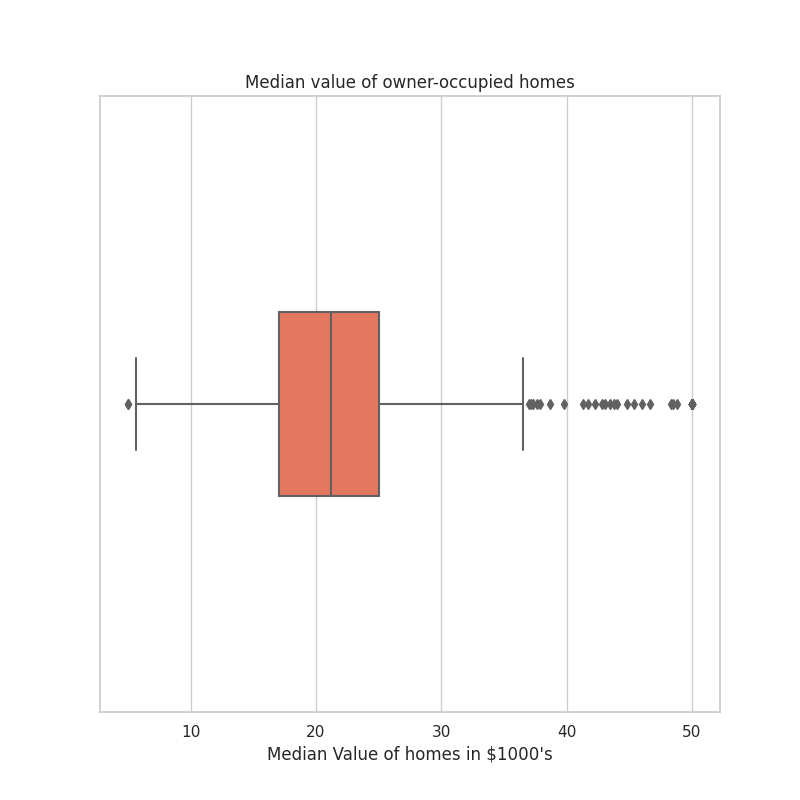

In [41]:
med_val = sns.boxplot( x='MEDV', data=boston_df, palette= 'Reds',width = 0.3).set(xlabel="Median Value of homes in $1000's",title = "Median value of owner-occupied homes")
plt.show()

There is a number of outliers beyond the maximum

#### Provide a  bar plot for the Charles river variable

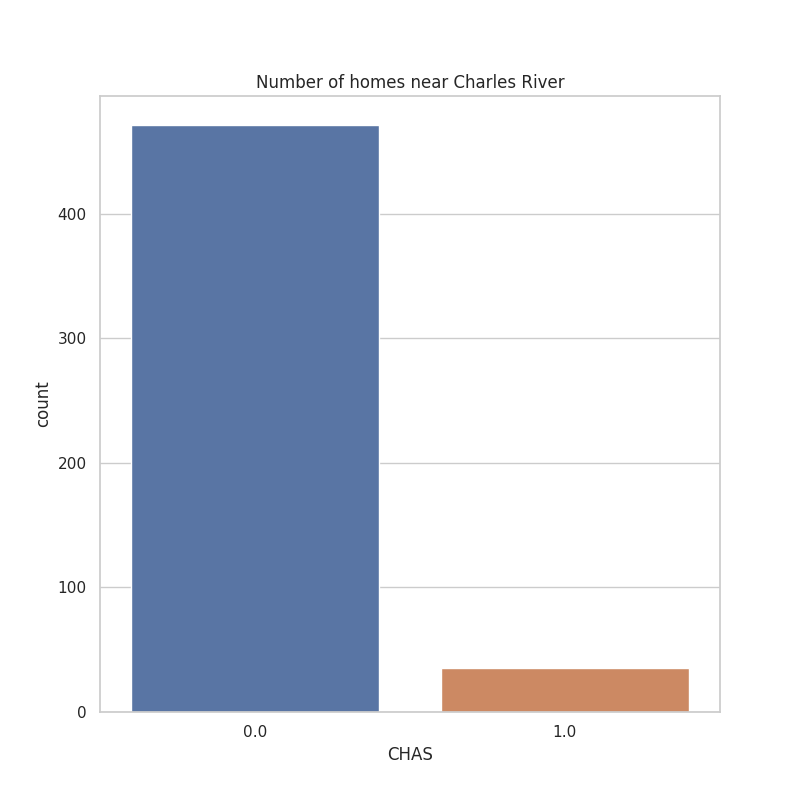

In [42]:
ax = sns.countplot(x="CHAS", data=boston_df).set(title = 'Number of homes near Charles River')
plt.show()

Majority of home does not lie near the Charles River

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [46]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

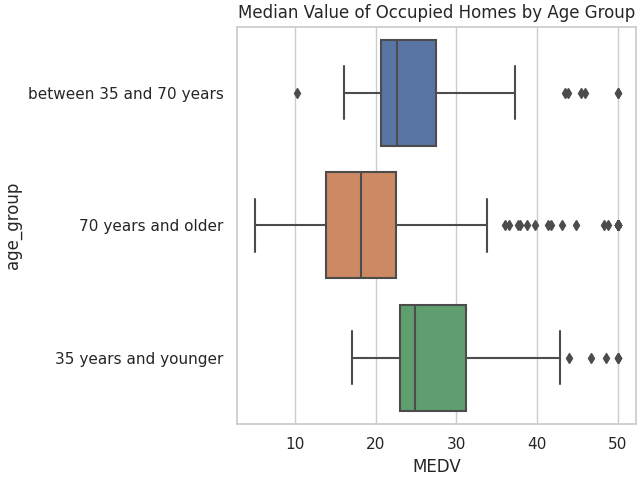

In [50]:
plot3 = sns.boxplot(x = 'MEDV', y = 'age_group',data = boston_df)
plot3.set_title('Median Value of Occupied Homes by Age Group')
plt.show()

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

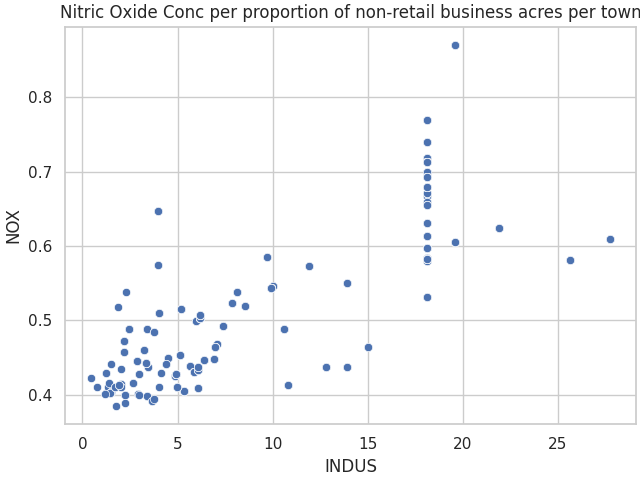

In [53]:
plot4 = sns.scatterplot(x='INDUS', y='NOX',
                     data=boston_df)
plot4.set(title = 'Nitric Oxide Conc per proportion of non-retail business acres per town')
plt.show()

Generally the higher proportion of non-retail business acres per town the highter the NOX concentration

#### Create a histogram for the pupil to teacher ratio variable

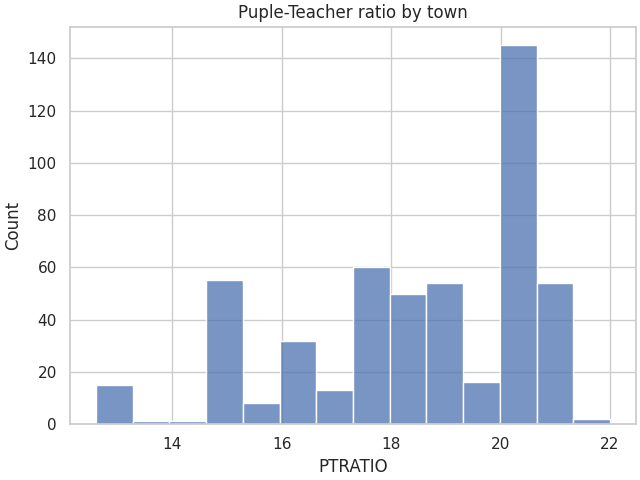

In [61]:
plot5 = sns.histplot(x ='PTRATIO',data = boston_df)
plot5.set(title = 'Puple-Teacher ratio by town' )
plt.show()

Most common pupil-teacher ratio  is 20-21

## Task 5: Use the appropriate tests to answer the questions provided.

In [62]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis:No significant difference in the median value of houses bounded and not bounded by the Charles river
Alternate Hypothesis: There is significant difference in the median value of houses bounded and not bounded by the Charles river

In [73]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'])

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

since the p-value is less than 0.05 we cannot assume equality of variance

In [69]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var= False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**As P-value < 0.05, we reject the null hypothesis as there is enough proof that there is statistical difference in median value of houses based on the proximity to the Charles river**

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null Hypothesis:No significant difference in the median value of houses for proportion of occupied units prior to 1940
Alternate Hypothesis: There is significant difference in the median value of houses for proportion of occupied units prior to 1940 of at least one of the age groups

In [75]:
young = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
mid = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [77]:
f_statistic, p_value = scipy.stats.f_oneway(young, mid, older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Since P-value < 0.05, we reject the null hypothesis as there is a statistical difference in the mean in at least one of the group for the MEDV for each proportion of occupied units built prior to 1940**

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypothesis: NOX is not correlated with INDUS as the variables are independent
Alternate Hypothesis:NOX is correlated with INDUS

In [79]:
scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])

(0.7636514469209189, 7.913361061211254e-98)

**Since the p-value < 0.05, we reject the null hypothesis as there is evidence that there is a correlation between NOX and the proportion of non-retail business acres per town**

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [80]:
from statsmodels.formula.api import ols

Null Hypothesis: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
Alternate Hypothesis:There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [85]:
y = boston_df['MEDV']
x = boston_df['DIS']

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.21e-08
Time:                        14:05:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value < 0.05, so we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. 
The DIS coefficient 1.09 indicates that the median value of homes increases by 1.09 per additional weighted distance to the 5 employment center